- stacked chart of player origin
- histogram of elo in a tournament
- histogram of playing time (need to transfer from string first)


In [1]:
import bga_function  #(self-made functions)
# from bs4 import BeautifulSoup
# import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
import statistics
import datetime
import re
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas # adds hvplot method to pandas objects
from contextlib import redirect_stdout
from bokeh.plotting import show
from bokeh.io import export_png
import os
waiting_time = 5

In [2]:
# service = webdriver.ChromeService(executable_path = r'C:\Users\chia-jung.s\Documents\GitHub\wpoc\code\chromedriver.exe')
service = webdriver.ChromeService(executable_path = r'C:\Users\Simon\Documents\GitHub\wpoc\code\chromedriver.exe')

driver = webdriver.Chrome(service=service)


# service = webdriver.FirefoxService(executable_path = r'C:\Users\Simon\app\bin\geckodriver.exe')
# driver = webdriver.Firefox(service=service)
driver.get("https://en.boardgamearena.com/account")
time.sleep(waiting_time)

In [3]:
from selenium.webdriver.common.keys import Keys
clickable1 = driver.find_element(By.XPATH, '//*[@id="account-module"]/div[3]/div[3]/div/div[2]/div/div[2]/div[1]/div/div[2]/form/div[2]/div/input')
ActionChains(driver).click(clickable1).send_keys("simbkt").perform()
clickable2 = driver.find_element(By.XPATH, '//*[@id="account-module"]/div[3]/div[3]/div/div[2]/div/div[2]/div[1]/div/div[2]/form/div[3]/div/a')
clickable2.click()
time.sleep(waiting_time)
clickable3 = driver.find_element(By.XPATH, '//*[@id="account-module"]/div[3]/div[3]/div/div[2]/div/div[2]/div[2]/div/form/div[1]/div[2]/div/input')
ActionChains(driver).click(clickable3).send_keys("qwerasdf").perform()
clickable4 = driver.find_element(By.XPATH, '//*[@id="account-module"]/div[3]/div[3]/div/div[2]/div/div[2]/div[2]/div/form/div[2]/div/div/a')
clickable4.click()
time.sleep(waiting_time)

### Scrap tournament page: get game name, user name and link, match link


In [ ]:
url = "https://boardgamearena.com/tournament?id=344680"

driver.get(url)

In [6]:
# get url of this tournament
tournament_link = driver.current_url
# get tournament name
tournament_name = driver.find_element(By.CLASS_NAME, 'tournaments-presentation__title-tournament').text
print(tournament_name)
# get game name
game_name = driver.find_element(By.CLASS_NAME, 'tournaments-presentation__title-game').find_element(By.CLASS_NAME, 'bga-link').text
print(game_name)
print(tournament_link)
# get start date
start_date = driver.find_element(By.CLASS_NAME, 'localDate').text[:10]
# get lists of names and link from the  tournament page; either finished, planned, ongoing 
entries_finished_tournament = driver.find_elements(By.CLASS_NAME, 'tournaments-results-players__name')
preliminary_entries = driver.find_elements(By.CLASS_NAME, 'tournaments-registered-players__player ')
entries_ongoing_tournament = []
for i in preliminary_entries:
    if i.find_element(By.CLASS_NAME, 'tournaments-registered-players__rank').text == 'invited':
        pass
    else:
        entries_ongoing_tournament.append(i.find_element(By.CLASS_NAME, 'tournaments-registered-players__name'))
# get rank of players
if game_name == '7 Wonders':
    top_rank_class = ['tournaments-results-players__player--rank1',
                      'tournaments-results-players__player--rank2',
                      'tournaments-results-players__player--rank3',
                      'tournaments-results-players__player--rank4',
                      'tournaments-results-players__player--rank5',
                      'tournaments-results-players__player--rank6',
                      'tournaments-results-players__player--rank7',
                      'tournaments-results-players__player--rank8']
else:
    top_rank_class = ['tournaments-results-players__player--rank1','tournaments-results-players__player--rank2','tournaments-results-players__player--rank3','tournaments-results-players__player--rank5']
ranked_player = []
for i in top_rank_class:
    entries = driver.find_elements(By.CLASS_NAME, i)
    for _ in entries:
        result = re.findall("(.*)\n(.*)",_.text)
        link = _.find_element(By.CLASS_NAME, "playername").get_attribute('href')
        ranked_player.append([result,link])
# get entries    
players=[]
player_links=[]
tables=[]
for i in entries_finished_tournament + entries_ongoing_tournament: # print results while running
    players.append(i.text)
    player_links.append(i.get_attribute("href"))
print(f"number of players: {len(players)}") 
if driver.find_element(By.CLASS_NAME,'tournaments-mode-presentation__name').text !='Groups Stage': #tournament other than group stage
    entries_table = driver.find_elements(By.CLASS_NAME, 'v2tournament__encounter-title')
    for i in entries_table:
        # print(i.get_attribute("href"))
        if i.text == 'Skipped': # dont include ongoing tables
            # print("skipped")
            pass
        else:
            tables.append(i.get_attribute("href"))
else: # group stage tournament 
    group_page_link = []
    for i in driver.find_elements(By.CLASS_NAME,'v2tournament__encounter-title'):
        group_page_link.append(i.get_attribute("href"))
    for link in group_page_link:
        if re.search("tournament",link): # stage 1 group link
            print("look into the page of a group...")
            driver.get(link)
            time.sleep(waiting_time)
            entries_table = driver.find_elements(By.CLASS_NAME, 'v2tournament__encounter-title')
            for i in entries_table:
                if i.text == 'Skipped': # dont include ongoing tables
                    # print("skipped")
                    pass
                else:
                    tables.append(i.get_attribute("href")) 
        else: # stage 2 elimination table links
            tables.append(link)     
tables = list(filter(None, tables)) # get rid of entries of skipped tables
print("number of tables:", len(tables))

Western Pacific Ocean Cup • Season 6
Wingspan
https://boardgamearena.com/tournament?id=352899
number of players: 88
look into the page of a group...
look into the page of a group...
number of tables: 271


## Scrap user page: retrun the information of users


In [7]:
# set initial state
interrupt = -1

In [8]:
# diagnosis code when interrupted
interrupt += 1
if interrupt == 0: # command to start new task
    pass
else:
    pos = len(player_info) 
    print("number of iteration left: ",len(players)-pos)
    waiting_time += 1

In [9]:
# estimate script running time
scrip_player_duration = len(players) * waiting_time * 1.43    #tried 1.4 1.5 1.45 1.43 
script_player_time = datetime.datetime.now() + datetime.timedelta(seconds=scrip_player_duration)
print(f"estimate to finish scraping {len(players)} players at {script_player_time.strftime('%H:%M')}")
# visit every user page
if interrupt == 0: # command to start new task
    player_info = []
    for i in range(len(players)): # loop into each player's user page
        player_info.append(bga_function.get_player_info(driver, waiting_time, player_links[i], game_name))
        print(len(player_info), end=" ")
else: # command when interrupt
    for i in range(pos, len(players)): # when interrupt
        player_info.append(bga_function.get_player_info(driver, waiting_time, player_links[i], game_name))
        print(len(player_info), end=" ")

print(f"finish scraping players at {datetime.datetime.now().strftime('%H:%M')}")    

estimate to finish scraping 88 players at 11:19
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 finish scraping players at 11:20


In [10]:
# diagnosis code when interrupted
print("number of iteration left: ",len(players) - len(player_info) )

number of iteration left:  0


In [11]:
# extract needed information
countries = []
elos = []
languages = []
reputations = []
# read the data
for i in player_info:
    if i[0] == '':
        pass
    else:
        countries.append(i[1].split(",")[0])
        elos.append(i[2])
        languages.append(i[3])
        reputations.append(i[4])
# get Q1, Q2,Q3
elos = [int(i) for i in elos] # convert string to value  in elos
elo_q1 = int(np.quantile(elos, .25))
elo_q2 = int(np.quantile(elos, .5))
elo_q3 = int(np.quantile(elos, .75))
# get top origins of players
top_countries = (pd.DataFrame(countries).value_counts() /len(countries) *100).astype('int').astype('str') +'%'
# make plot of elo distribution
df1 = pd.DataFrame(elos, columns=['elo'])
df1['dummy'] = 1
plot = hv.BoxWhisker(df1, vdims='elo')  * df1.hvplot.scatter(y='elo' ,x = 'dummy', c='orange', size = 5).opts(jitter=0.3)
plot.opts(invert_axes=True, height = 70, width=350, xlabel='',ylabel='', title ='Elo of players',yaxis = None, fontsize={'title': 11})
fig = hv.render(plot)
fig.outline_line_width = 0
fig.toolbar.autohide = True
show(fig)
# save into png and make transparent background
elo_file = '../assets/images/' + game_name + tournament_name +"_Elo_" + time.strftime("%Y%m%d%H%M%S", time.localtime()) + '.png'
export_png(fig, filename = elo_file)
print('output image:', elo_file)
transformed_elo_file = bga_function.transparent_background(elo_file)
os.remove(elo_file)
# list local origins
watch_list =['South Korea','North Korea','Japan',
             'China','Hong Kong','Macao','Taiwan',
             'Singapore','Viet Nam','Thailand','Indonesia','Malaysia','Philippines','Myanmar','Cambodia',
             'India','Bangladesh','Pakistan',
             'Kazakhstan','Mongolia','Georgia',
             'Australia','New Zealand']
index_list = []
index = 0
for i in countries:
    if i in watch_list:
        index_list.append(index)
    else:
        pass
    index +=1
# list information
with open(game_name + ' - ' +tournament_name + '.txt', "w", encoding='utf-8') as f:
    with redirect_stdout(f):
        print("---LocalPlayer---\n")
        for i in index_list:
            print(players[i]) if int(reputations[i].strip("%")) >= 85 else None            
        print("\n- Reputations:\n")
        for i in index_list:
            print(players[i], "-",reputations[i])          
        print("\n\n---link of user page---\n")
        for i in index_list:
            print(player_links[i])
        print("\n---Origin---\n")
        for i in index_list:
            print(countries[i])
        print("\n---Language---\n")
        for i in index_list:
            print(', '.join(languages[i]))
        print("\n\n- Origins of players:\n")
        print(top_countries)
        print("\n\n\n- Q1/Q2/Q3 of player's Elo rating:\n")
        print(f"{elo_q1}/{elo_q2}/{elo_q3}")
f.close()
### finish scraping player data
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
time.sleep(waiting_time)

output image: ../assets/images/WingspanWestern Pacific Ocean Cup • Season 6_Elo_20250402112008.png
output: ../assets/images/t_WingspanWestern Pacific Ocean Cup • Season 6_Elo_20250402112008.png
2025-04-02 11:20:11


## read the list of tables, return table duration and slow players:

In [12]:
# set initial state
interrupt = -1

In [13]:
### diagnosis code when interrupted
interrupt += 1
if interrupt == 0: # command to start new task
    scrip_table_duration = len(tables) * waiting_time * 1.5
else: #interrupt not equal to 0
    pos = len(table_info) 
    print("number of iteration left: ",len(tables)-pos)
    waiting_time += 1
    scrip_table_duration = (len(tables)-pos) * waiting_time * 1.5

In [14]:
# loop into all tables
# estimate time needed
script_table_time = datetime.datetime.now() + datetime.timedelta(seconds=scrip_table_duration)
print(f"estimate to finish scraping {len(tables)} tables at {script_table_time.strftime('%H:%M')}")
if interrupt == 0: # when scraping for the first time
    table_info = []
    for i in range(len(tables)):
        table_info.append(bga_function.get_table_info(driver, waiting_time,tables[i]))
        print(len(table_info), end=" ")
else: # when interrupt not equal to 0
    for i in range(pos, len(tables)): 
        table_info.append(bga_function.get_table_info(driver, waiting_time,tables[i]))
        print(len(table_info), end=" ")

estimate to finish scraping 271 tables at 11:54
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 

In [15]:
### diagnosis code when interrupted
print("number of iteration left: ",len(tables)-len(table_info))

number of iteration left:  0


In [16]:
# list players that is either too slow or leave the game intentionly
black_list = []
for i in table_info:
    if i[3] != '': # leave or kicked
        black_list.append(i[3]) 
    elif i[4] != '':  # didnt finish on time
        black_list.append(i[4]) 
# append the black list to the file
f = open(game_name + ' - ' +tournament_name + '.txt', "a", encoding='utf-8')
f.write("\n---BlackList---\n\n") 
for i in black_list:
    f.write(i)
    f.write("\n")
f.close()
# statistics"""'
number_tables = len(tables)
ratio_cancelled_tables = 0
for i in range(len(table_info)):
    # print(table_info[i][0])
    ratio_cancelled_tables += 1/number_tables if table_info[i][0] == 'cancelled' else 0
ratio_abandoned_tables = 0
for i in range(len(table_info)):
    ratio_abandoned_tables +=1/number_tables if table_info[i][0] == 'abandoned' else 0        
table_times = []
for i in range(len(table_info)):
    table_times.append(table_info[i][1])
# create df with player name and time spent
df = pd.DataFrame(columns = ['Player', 'Used_time'])
for i in range(len(table_info)):
    players_time = table_info[i][2] 
    for i in players_time:
        dict = {'Player':[i[0]], 
                'Used_time':[i[1]] 
               } 
        df_add = pd.DataFrame(dict) 
        df = pd.concat([df, df_add], ignore_index = True) 
# convert the unit of duration into days
converted_table_times = bga_function.time_converstion(table_times)
# spread statistics
median_duration = round(statistics.median(converted_table_times),1)
duration_q1 = (np.quantile(converted_table_times, .25))
duration_q2 = (np.quantile(converted_table_times, .5))
duration_q3 = (np.quantile(converted_table_times, .75))
print("Q1/Q2/Q3 quantile of time: ", duration_q1,duration_q2,duration_q3)
f = open(game_name + ' - ' +tournament_name + '.txt', "a", encoding='utf-8')
f.write("\n-----\nQ1/Q2/Q3 quantile of time: \n")
f.write(str(duration_q1) + ", "+str(duration_q2) + ", "+ str(duration_q3)) 
f.write("\n")
f.close()
# plot
from bokeh.plotting import show
from bokeh.io import export_png
df2 = pd.DataFrame(converted_table_times, columns=['tt'])
df2['dummy'] = 1
plot = hv.BoxWhisker(df2, vdims='tt')  * df2.hvplot.scatter(y='tt' ,x = 'dummy', c='orange', size=5).opts(jitter=0.3)
plot.opts(invert_axes=True, height = 70, width=350, xlabel='',ylabel='', yaxis=None, title='Table duration (days)',fontsize={'title': 11})
fig = hv.render(plot)
fig.outline_line_width =0
fig.toolbar.autohide = True
show(fig)
# save into png and make transparent background
duration_file = '../assets/images/'+ game_name + tournament_name + "_Duration_" +time.strftime("%Y%m%d%H%M%S", time.localtime()) + '.png'
export_png(fig, filename=duration_file)
print('output image:', duration_file)
transformed_duration_file = bga_function.transparent_background(duration_file)
os.remove(duration_file)
### finish table part
print(f"- Abandoned tables (reached duration limit): {ratio_abandoned_tables:.0%}")
print(f"- Cancelled tables (player left or got kicked): {ratio_cancelled_tables:.0%}")
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
time.sleep(waiting_time)

Q1/Q2/Q3 quantile of time:  1.4 2.6 4.0


output image: ../assets/images/WingspanWestern Pacific Ocean Cup • Season 6_Duration_20250402115348.png
output: ../assets/images/t_WingspanWestern Pacific Ocean Cup • Season 6_Duration_20250402115348.png
- Abandoned tables (reached duration limit): 10%
- Cancelled tables (player left or got kicked): 4%
2025-04-02 11:53:49


## summary

In [17]:
# summary message
print(f"- [{tournament_name.replace("Western Pacific Ocean Cup • ","")}]({tournament_link})")
print("- Date:",start_date, "- __/2025") #put this manually 
print('- Number of players:', len(players))
print("- Top origins of players:",top_countries.index[0][0], f"{top_countries.iloc[0]}", top_countries.index[1][0], f"{top_countries.iloc[1]}", top_countries.index[2][0], f"{top_countries.iloc[2]}", top_countries.index[3][0], f"{top_countries.iloc[3]}", top_countries.index[4][0], f"{top_countries.iloc[4]}") 
print(f"- Abandoned tables (reached duration limit): {ratio_abandoned_tables:.0%}")
print(f"- Cancelled tables (player left or got kicked): {ratio_cancelled_tables:.0%}")
print("- Q1/Q2/Q3 of player's Elo rating:", f"{elo_q1}/{elo_q2}/{elo_q3}")
print("- Q1/Q2/Q3 of table duration (days):", f"{round(duration_q1,1)}/{round(duration_q2,1)}/{round(duration_q3,1)}") 
print("- Winners(meta event points):", 
    f'{ranked_player[0][0][0][0]}(100);', 
    f'{ranked_player[1][0][0][0]}(75);',
    f'{ranked_player[2][0][0][0]}(50);',
    f'{ranked_player[3][0][0][0]}(50);',
    f'{ranked_player[4][0][0][0]}(10);',    
    f'{ranked_player[5][0][0][0]}(10);',
    f'{ranked_player[6][0][0][0]}(10);',
    f'{ranked_player[7][0][0][0]}(10)',)
# image links
print("")
print('<div>')
print(' <img src="/wpoc/assets/images/tournament/', re.findall('assets/images/(.*)',transformed_elo_file)[0],'" width="300" style="display: block; margin-left: 30px; margin-bottom: 5px; margin-top:-15px"/>', sep='')
print('</div>')
print('<div>')
print(' <img src="/wpoc/assets/images/tournament/', re.findall('assets/images/(.*)',transformed_duration_file)[0],'" width="300" style="display: block; margin-left: 30px; margin-bottom: 5px;"/>', sep='')
print('</div>')
print('<p>&nbsp;</p>')
# Things to check manually
print("\n\n1. check last day of tournament from the tournament page")
print("(7Wonders) change the 4th player point to 25")
print("2. update Region standings of one specific game")
print("3. update Region standings of sum of all game")
print("4. move the elo and table duration figure to the corresponing folder")

- [Season 6](https://boardgamearena.com/tournament?id=352899)
- Date: 02/10/2025 - __/2025
- Number of players: 88
- Top origins of players: United States of America 27% Germany 11% United Kingdom 6% Ukraine 5% Belgium 4%
- Abandoned tables (reached duration limit): 10%
- Cancelled tables (player left or got kicked): 4%
- Q1/Q2/Q3 of player's Elo rating: 140/229/360
- Q1/Q2/Q3 of table duration (days): 1.4/2.6/4.0
- Winners(meta event points): play4fun71139(100); Vincent434(75); cmatt88(50); alejandro_sugar(50); Oleksiipol(10); ReeG0dlevska(10); piqui(10); Gugson(10)

<div>
 <img src="/wpoc/assets/images/tournament/t_WingspanWestern Pacific Ocean Cup • Season 6_Elo_20250402112008.png" width="300" style="display: block; margin-left: 30px; margin-bottom: 5px; margin-top:-15px"/>
</div>
<div>
 <img src="/wpoc/assets/images/tournament/t_WingspanWestern Pacific Ocean Cup • Season 6_Duration_20250402115348.png" width="300" style="display: block; margin-left: 30px; margin-bottom: 5px;"/>
</di

# Player_ranking

In [18]:
# add region information to ranked players
for item in ranked_player:
    player_region = bga_function.get_player_info(driver, waiting_time, item[1], game_name)[1]
    item.append(player_region)

In [19]:
f = open('../assets/csv/result.csv', "a", encoding='utf-8')
print("2. check csv:")
for item in ranked_player:
    # print(item[0][0][1])
    # print(game_name,",", tournament_name.replace("Western Pacific Ocean Cup • ",""),"," ,item[0][0][0], ",", item[2],",",item[0][0][1], sep='')    
    print(game_name,",", 
          tournament_name.replace("Western Pacific Ocean Cup • ",""),"," ,
          item[0][0][0], ",", 
          item[2].split(",")[0],",",
          item[0][0][1].replace("1st", "100").replace("2nd", "75").replace("3rd", "50").replace("4th", "25") \
          .replace("5th", "10").replace("6th", "10").replace("7th", "10").replace("8th", "10"), 
          sep='')    
    f.write(game_name + "," + 
          tournament_name.replace("Western Pacific Ocean Cup • ","") +"," +
          item[0][0][0]+ ","+ 
          item[2].split(",")[0]+","+
          item[0][0][1].replace("1st", "100").replace("2nd", "75").replace("3rd", "50").replace("4th", "25") \
          .replace("5th", "10").replace("6th", "10").replace("7th", "10").replace("8th", "10")+"\n")
f.close()

2. check csv:
Wingspan,Season 6,play4fun71139,Germany,100
Wingspan,Season 6,Vincent434,Belgium,75
Wingspan,Season 6,cmatt88,United States of America,50
Wingspan,Season 6,alejandro_sugar,United States of America,50
Wingspan,Season 6,Oleksiipol,Ukraine,10
Wingspan,Season 6,ReeG0dlevska,Ukraine,10
Wingspan,Season 6,piqui,Romania,10
Wingspan,Season 6,Gugson,Poland,10


In [20]:
# test

# # f.write("\n-----\nQ1/Q2/Q3 quantile of time: \n")


# # f.write(str(duration_q1) + ", "+str(duration_q2) + ", "+ str(duration_q3)) 
# # f.write("\n")

# f.write(game_name + "," + 
#           tournament_name.replace("Western Pacific Ocean Cup • ","") +"," +
#           item[0][0][0]+ ","+ 
#           item[2].split(",")[0]+","+
#           item[0][0][1].replace("1st", "100").replace("2nd", "75").replace("3rd", "50").replace("4th", "25") \
#           .replace("5th", "10").replace("6th", "10").replace("7th", "10").replace("8th", "10")+"\n")
# f.close()

In [21]:
##################################
####### pause here to update data
print("continue after editin result.csv")
##################################

continue after editin result.csv


C:\Users\Simon\Documents\GitHub\wpoc\code\bga_function.py:258: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(selected_data['PlayerName'],      # Set labels again


../assets/images/ranking/WingspanRanking.png
Wingspan
🥇Australia(370) 🥈United States of America(320) 🥉Germany(210)
Region
Australia                   370
United States of America    320
Germany                     210
France                      185
Hong Kong                   150
Japan                       130
China                        85
Belgium                      85
Thailand                     75
Peru                         70
Name: MetaPoint, dtype: int64


C:\Users\Simon\Documents\GitHub\wpoc\code\bga_function.py:258: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(selected_data['PlayerName'],      # Set labels again


../assets/images/ranking/AllGamesRanking.png
All Games
🥇Japan(1700) 🥈United States of America(1275) 🥉China(1260)
Region
Japan                       1700
United States of America    1275
China                       1260
France                      1230
Poland                       805
Germany                      720
Australia                    685
Hong Kong                    595
Belgium                      440
Spain                        415
Name: MetaPoint, dtype: int64


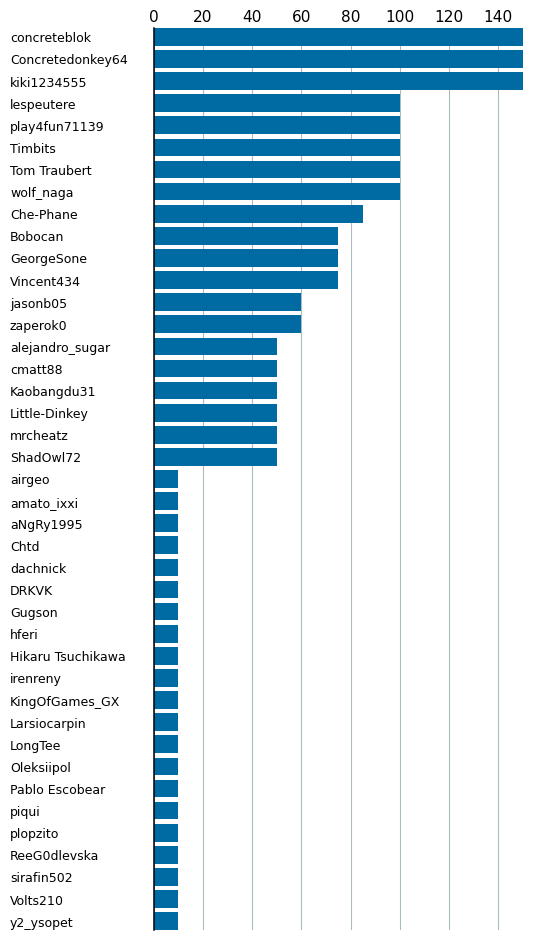

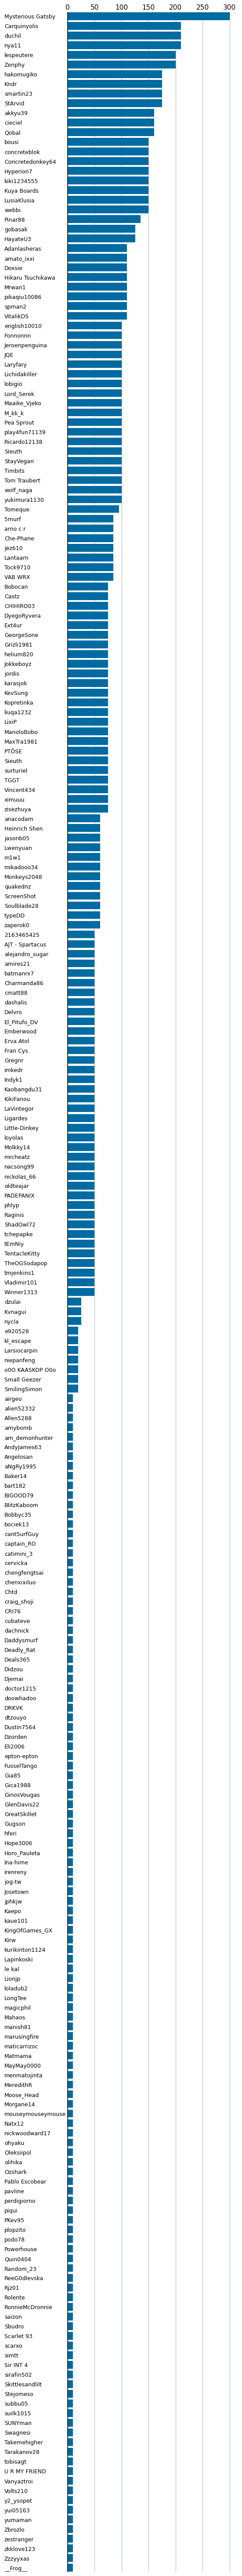

In [22]:
# after update the csv file, output the graph
import bga_function  #(self-made functions)
import time
# for _ in ['7 Wonders','Azul','Carcassonne','The Castles of Burgundy','Forest Shuffle','Ticket to Ride', 'Splendor', 'Wingspan', 'Kingdomino','All Games']:
for _ in [game_name,'All Games']:
    bga_function.PlayerRankingChart(_)
    time.sleep(5)